This notebook devote to understand ring attractor or toroidal attractor when the features were embed in a low dimensional space in images

### Define our filter and compute dimensionality

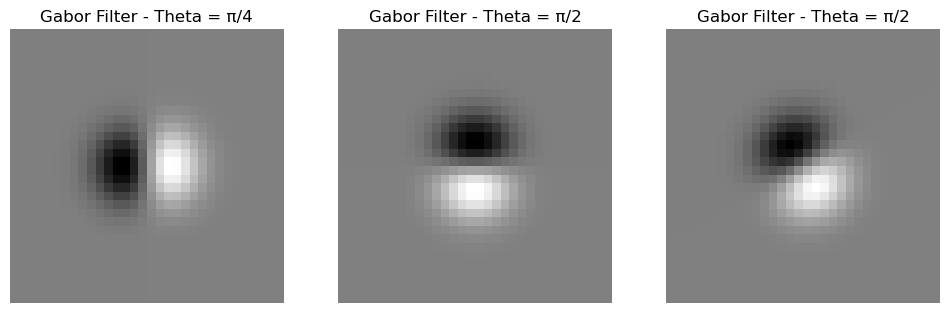

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def gabor_filter(size, sigma, theta, lambda_, gamma, psi):
    """
    Generate a Gabor filter with the given parameters.

    Parameters:
    - size: Size of the filter (size x size).
    - sigma: Standard deviation of the Gaussian envelope.
    - theta: Orientation of the filter in radians (0 is horizontal).
    - lambda_: Wavelength of the sinusoidal factor.
    - gamma: Spatial aspect ratio.
    - psi: Phase offset.
    
    Returns:
    - gabor: A 2D array representing the Gabor filter.
    """
    xmax, ymax = size // 2, size // 2
    x = np.linspace(-xmax, xmax, size)
    y = np.linspace(-ymax, ymax, size)
    X, Y = np.meshgrid(x, y)

    # Rotation
    x_theta = X * np.cos(theta) + Y * np.sin(theta)
    y_theta = -X * np.sin(theta) + Y * np.cos(theta)

    # Gabor formula
    gabor = np.exp(-0.5 * ((x_theta**2 + gamma**2 * y_theta**2) / sigma**2)) * np.cos(2 * np.pi * x_theta / lambda_ + psi)

    return gabor

def gabor_prime(size, sigma, theta, lambda_, gamma, psi):
    """
    Generate a Gabor filter with the given parameters.

    Parameters:
    - size: Size of the filter (size x size).
    - sigma: Standard deviation of the Gaussian envelope.
    - theta: Orientation of the filter in radians (0 is horizontal).
    - lambda_: Wavelength of the sinusoidal factor.
    - gamma: Spatial aspect ratio.
    - psi: Phase offset.
    
    Returns:
    - gabor: A 2D array representing the Gabor filter.
    """
    xmax, ymax = size // 2, size // 2
    x = np.linspace(-xmax, xmax, size)
    y = np.linspace(-ymax, ymax, size)
    X, Y = np.meshgrid(x, y)

    # Rotation
    x_theta = X * np.cos(theta) + Y * np.sin(theta)
    y_theta = -X * np.sin(theta) + Y * np.cos(theta)

    # Gabor formula
    gabor = x_theta * np.exp(-0.5 * ((x_theta**2 + y_theta**2) / sigma**2)) 

    return gabor

# Define common parameters
size = 32
sigma = 3.0
lambda_ = 3.0
gamma = 0.5
psi = 0

# Create two Gabor filters with different orientations but same spatial frequency
gabor1 = gabor_prime(size, sigma, theta=0, lambda_=lambda_, gamma=gamma, psi=psi)
gabor2 = gabor_prime(size, sigma, theta=np.pi/2, lambda_=lambda_, gamma=gamma, psi=psi)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(12, 6))
axes[0].imshow(gabor1, cmap='gray')
axes[0].set_title('Gabor Filter - Theta = π/4')
axes[0].axis('off')

axes[1].imshow(gabor2, cmap='gray')
axes[1].set_title('Gabor Filter - Theta = π/2')
axes[1].axis('off')
axes[2].imshow((gabor2 * np.sin(np.pi/3) + gabor1 * np.cos(np.pi/3)), cmap='gray')
axes[2].set_title('Gabor Filter - Theta = π/2')
axes[2].axis('off')

plt.show()


The filter we defined is truly 2 dimensional. Any sample can be effectively represented by any two samples.  

matrix rank 2


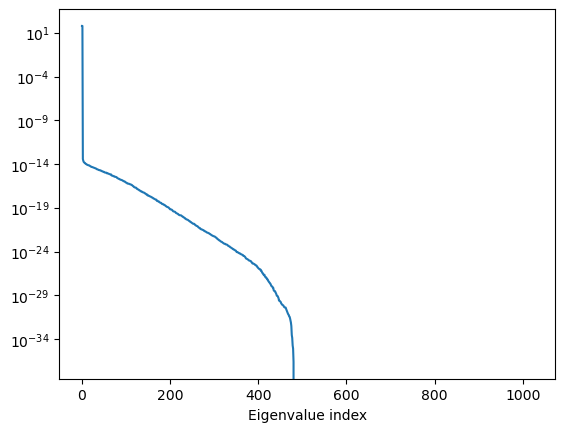

N eigenval 2


In [36]:
size = 32
sigma = 3.0
lambda_ = 3.0
gamma = 0.5
psi = 0
gabor_col = []
for theta in np.linspace(0, 2*np.pi, 300):
    gabor = gabor_prime(size, sigma, theta=theta, lambda_=lambda_, gamma=gamma, psi=psi)
    gabor_col.append(gabor)
gabor_arr = np.array(gabor_col)
gabor_mat = gabor_arr.reshape(gabor_arr.shape[0], -1)
print("matrix rank", np.linalg.matrix_rank(gabor_mat))
eigval, eigvec = np.linalg.eigh(np.cov(gabor_mat.T))
plt.semilogy(eigval[::-1])
plt.xlabel("Eigenvalue index")
plt.show()
print("N eigenval",(eigval>1E-6).sum())

The official Gabor wavelet is not that low dimensional... though one hidden orientation dimension in it, the ambient dimension is not 2. 

matrix rank 86
N eigenval 48


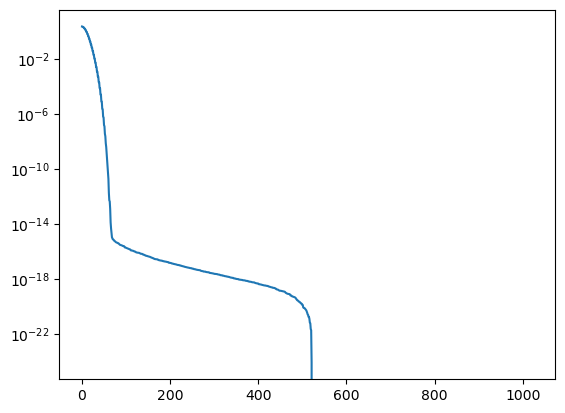

In [35]:
size = 32
sigma = 3.0
lambda_ = 3.0
gamma = 0.5
psi = 0
gabor_col = []
for theta in np.linspace(0, 2*np.pi, 300):
    gabor = gabor_filter(size, sigma, theta=theta, lambda_=lambda_, gamma=gamma, psi=psi)
    gabor_col.append(gabor)
gabor_arr = np.array(gabor_col)
gabor_mat = gabor_arr.reshape(gabor_arr.shape[0], -1)
print("matrix rank", np.linalg.matrix_rank(gabor_mat))

eigval, eigvec = np.linalg.eigh(np.cov(gabor_mat.T))
plt.semilogy(eigval[::-1])
plt.xlabel("Eigenvalue index")
plt.show()
print("N eigenval",(eigval>1E-6).sum())

In short we can use the redefined "wavelet" to study linear ring attractor (in pixel space), and the classic gabor or morley wavelet to study the nonlinear ring attractor with low dim hidden structure in it. 